In [ ]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

In [ ]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
tfds.disable_progress_bar()

In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
train_dataset.element_spec

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
#pip install kaggle

In [ ]:
#kaggle kernels output "tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model" -p F:/Sentiment


In [ ]:
#for example,label in train_dataset.take(1):
   # print(label.numpy())
    #print(label.numpy())
    

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
    print('texts: ', example.numpy()[:3])
    print()
    print('labels: ', label.numpy()[:3])

texts:  [b"Every once in a while I will rent an action/adventure film just as a way to relax and occupy my mind with nothing important. This is why I own a copy of Charlie's Angels (2000) - not a quality film, but it makes me laugh and allows me to unwind for a while. One of these days I will probably buy copies of The Princess Bride and a few Monty Python movies for much the same reason.<br /><br />In any case, I rented this film because I wanted to be entertained without being challenged. For the most part, I got what I wanted. The plot was something along the lines of a poorly written Xena episode, and the Kathy Long's acting was very community theater (not bad for a professional kick boxer and amateur actress). There were a few high points on the part of the cyborgs. Somehow they managed to get some pretty good actors to play the bad guys - unfortunately, most of them die pretty darned quick.<br /><br />Like most martial arts films, the further you get into the movie, the more emph

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[168, 272,   8, ...,   0,   0,   0],
       [  1,   1,   6, ...,   0,   0,   0],
       [ 11,  20,   7, ...,   0,   0,   0]])

In [ ]:
for n in range(3):
    print("Original: ", example[n].numpy())
    print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
    print()

Original:  b"Every once in a while I will rent an action/adventure film just as a way to relax and occupy my mind with nothing important. This is why I own a copy of Charlie's Angels (2000) - not a quality film, but it makes me laugh and allows me to unwind for a while. One of these days I will probably buy copies of The Princess Bride and a few Monty Python movies for much the same reason.<br /><br />In any case, I rented this film because I wanted to be entertained without being challenged. For the most part, I got what I wanted. The plot was something along the lines of a poorly written Xena episode, and the Kathy Long's acting was very community theater (not bad for a professional kick boxer and amateur actress). There were a few high points on the part of the cyborgs. Somehow they managed to get some pretty good actors to play the bad guys - unfortunately, most of them die pretty darned quick.<br /><br />Like most martial arts films, the further you get into the movie, the more em

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True, True, True]


In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 9s 9s/step
[0.00369679]


In [ ]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

1/1 [==============================] - 0s 111ms/step
[0.00369679]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)


Epoch 1/10
391/391 [==============================] - 80s 157ms/step - loss: 0.6465 - accuracy: 0.5602 - val_loss: 0.4456 - val_accuracy: 0.7937
Epoch 2/10
391/391 [==============================] - 48s 122ms/step - loss: 0.3934 - accuracy: 0.8244 - val_loss: 0.3590 - val_accuracy: 0.8406
Epoch 3/10
391/391 [==============================] - 45s 114ms/step - loss: 0.3349 - accuracy: 0.8551 - val_loss: 0.3354 - val_accuracy: 0.8422
Epoch 4/10
391/391 [==============================] - 43s 110ms/step - loss: 0.3265 - accuracy: 0.8602 - val_loss: 0.3283 - val_accuracy: 0.8599
Epoch 5/10
391/391 [==============================] - 44s 112ms/step - loss: 0.3104 - accuracy: 0.8669 - val_loss: 0.3233 - val_accuracy: 0.8453
Epoch 6/10
391/391 [==============================] - 43s 109ms/step - loss: 0.3072 - accuracy: 0.8690 - val_loss: 0.3210 - val_accuracy: 0.8620
Epoch 7/10
391/391 [==============================] - 44s 111ms/step - loss: 0.3028 - accuracy: 0.8711 - val_loss: 0.3286 - val_ac

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/My Drive/usman_model') 

In [ ]:
new_model = tf.keras.models.load_model('usman_model')



In [ ]:
new_model = tf.keras.models.load_model('usman_model')
test_loss, test_acc = new_model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
# Check its architecture
]new_model.summary()

391/391 [==============================] - 24s 48ms/step - loss: 0.3178 - accuracy: 0.8623
Test Loss: 0.317804217338562
Test Accuracy: 0.862280011177063
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                   

In [ ]:
# predict on a sample text without padding.

sample_text = ('The wedding hall was very bad and the organizers were not professional.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

sample_text = ('The wedding hall was good but the overall event was exciting.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

if(predictions>(-0.4)):
  print("Good Review")

if(predictions<(-0.4)):
  print("Bad Review")


1/1 [==============================] - 5s 5s/step
[[-1.0993527]]
1/1 [==============================] - 0s 44ms/step
[[0.46861812]]
Good Review


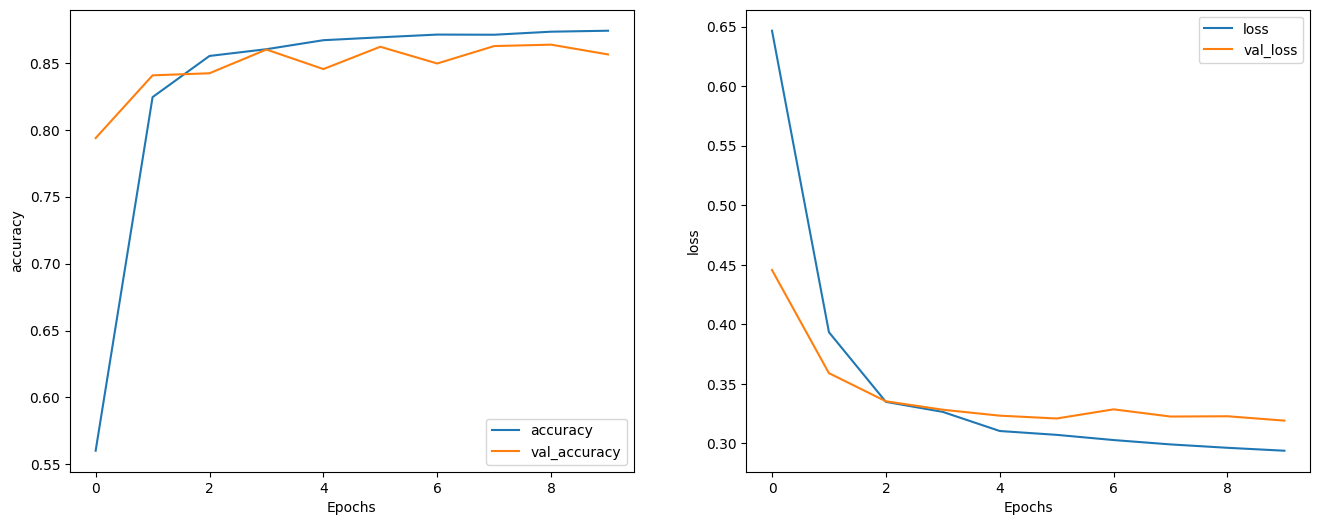

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')